In [169]:
import pandas as pd
import numpy as np
import tweepy
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import re
import json
import warnings
import os
import time
from scipy import stats
import matplotlib.patches as mpatches

***Gathering Data***







**first File .csv**

In [110]:
TAE = pd.read_csv("twitter-archive-enhanced.csv")

second File .**tsv**

In [111]:
URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(URL)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

**can not get devolper user**


In [112]:
'''
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.

**third File .txt**

In [113]:
tweets_data = []
with open("tweet-json copy") as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
df_api = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))
df_api.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9774,41048,False,False,False,False,en


In [114]:
tweeter_API = df_api[['id', 'retweet_count', 'favorite_count']]
 
tweeter_API.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


**Assessing**

**visual assessment**

In [115]:
TAE

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [52]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [116]:
tweeter_API

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


**programmatic assessment**

In [117]:
TAE.info()
TAE.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [118]:
image_prediction.info()
image_prediction.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [119]:
tweeter_API.info()
tweeter_API.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [120]:
sum(TAE.duplicated())

0

In [121]:
TAE.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [122]:
sum(image_prediction.duplicated())

0

In [123]:
sum(tweeter_API.duplicated())

0

***Quality***

   - TAE Quality
1- the dog name somtimes called (a) and (an)
2- "timestamp" and "retweeted_status_timestamp" need to chage to datetime variable.
3- the columns like "doggo", "floofer", "pupper" and "puppo" should be one column because it's all refer to the same info (dog class)
4- need to remove retweet
5- remove retweet columns.
6- (tweet_id, in_reply_to_status_id) should not be intger
7- retweet_count and favorite_count should be integers, not floats

   - image_prediction Quality
1- there is 2075 row in image prediction but there is 2356 row in TAE so there is 281 missing row
2- colum's name need to change to be clear


   - tweeter_API Quality
1- there is 2338 row in tweeter_API but there is 2356 row in TAE so there is 18 missing row



***Tidy***

1- the columns like "doggo", "floofer", "pupper" and "puppo" should be one column because it's all refer to the same info (dog class)
2- the data need to be merged

***Clean***

In [124]:
TAE_copy = TAE.copy()
image_prediction_copy = image_prediction.copy()
tweeter_API_copy = tweeter_API.copy()

Define

replace the dog name like (a) and (an) to none

In [125]:

TAE_copy[TAE_copy.name.str.islower()==True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

Code

In [126]:
wrong_name = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
              'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
              'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
              'officially', 'life', 'light', 'space']

In [127]:
for x in wrong_name:
    TAE_copy.name.replace(x, 'None',inplace=True)

Test

In [128]:
TAE_copy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold',
       'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Quinn', 'Belle', 'Zooe

Define
Create dog_type column

Code

Test

Define

changing the type of timestamp to datetime format

Code

In [129]:
TAE_copy['timestamp']= pd.to_datetime(TAE_copy['timestamp'])
TAE_copy['retweeted_status_timestamp']= pd.to_datetime(TAE_copy['retweeted_status_timestamp'])

Test

In [130]:
TAE_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

Define
DECIMAL DOG RATINGS

Code

In [131]:
TAE_copy[TAE_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


Define

Create dog stage column instead of "doggo", "floofer", "pupper" and "puppo"

Code

In [132]:

def dog_stage(row):
    stage = []
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if row['puppo'] == 'puppo':
        stage.append('puppo')
    
    if not stage:
        return "None"
    else:
        return ','.join(stage)
    
TAE_copy['dog_stage'] = TAE_copy.apply(lambda row: dog_stage(row), axis=1)

In [133]:
TAE_copy.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

Test

In [134]:


pd.value_counts(TAE_copy['dog_stage'])

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

Define

need to remove retweet

Code

In [135]:
TAE_copy = TAE_copy[TAE_copy['retweeted_status_id'].isnull()]

Test

In [136]:
TAE_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     2175 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 254.9+ KB


Define

Remove retweet columns.

Code

In [137]:
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
TAE_copy = TAE_copy.drop(columns, axis=1)

Test

In [138]:
TAE_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 203.9+ KB


Define

columns name need to change

Code

In [139]:
image_prediction_copy = image_prediction_copy.rename(columns = {'p1': 'prediction1', 'p1_conf': 'prediction1_conf', 'p1_dog': 'Is_dog1', 
                                        'p2': 'prediction2', 'p2_conf': 'prediction2_conf', 'p2_dog': 'Is_dog2','p3': 'prediction3', 'p3_conf': 'prediction3_conf', 'p3_dog': 'Is_dog3',})

Test

In [140]:
list(image_prediction_copy)

['tweet_id',
 'jpg_url',
 'img_num',
 'prediction1',
 'prediction1_conf',
 'Is_dog1',
 'prediction2',
 'prediction2_conf',
 'Is_dog2',
 'prediction3',
 'prediction3_conf',
 'Is_dog3']

Define

rename the ID in tweeter_API to tweet_id


Code

In [141]:
tweeter_API_copy.rename(columns={ 'id': 'tweet_id','retweet_count':'retweets','favorite_count':'likes'}, inplace=True)


Test

In [142]:
tweeter_API_copy.head()

,tweet_id,retweets,likes
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


Define

change tweet IDs from int to string

Code

In [143]:
TAE_copy['tweet_id'] = TAE_copy['tweet_id'].astype('str')
TAE_copy['in_reply_to_status_id'] = TAE_copy['in_reply_to_status_id'].astype('str')
image_prediction_copy['tweet_id'] = image_prediction_copy['tweet_id'].astype('str')
tweeter_API_copy['tweet_id'] = tweeter_API_copy['tweet_id'].astype('str')

Test

In [144]:
type(TAE_copy['tweet_id'].iloc[0])
type(image_prediction_copy['tweet_id'].iloc[0])
type(tweeter_API_copy['tweet_id'].iloc[0])

str

Define
retweet_count and favorite_count should be integers, not floats

Code

In [145]:
tweeter_API_copy['retweets'] = tweeter_API_copy['retweets'].astype('int')
tweeter_API_copy['likes'] = tweeter_API_copy['likes'].astype('int')

Test

In [146]:
type(tweeter_API_copy['retweets'].iloc[0])
type(tweeter_API_copy['likes'].iloc[0])


numpy.int64

Define

merging the three tables

Code

In [147]:
merging_data = pd.merge(TAE_copy, image_prediction_copy, on=['tweet_id'], how='inner')
merging_data = pd.merge(merging_data, tweeter_API_copy, on = 'tweet_id', how = 'inner' )

Test

In [148]:
merging_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
prediction1              1994 non-null object
prediction1_conf         1994 non-null float64
Is_dog1                  1994 non-null bool
prediction2              1994 non-null object
prediction2_conf         1994 non-null float64
Is_dog2                  1994 non-null bool
prediction3      

In [149]:
merging_data['rating'] = merging_data['rating_numerator'] / merging_data['rating_denominator']

***Storing Data***

In [150]:
merging_data.to_csv('Tweeter_archive_after_merging.csv', encoding='utf-8',index=False)


In [151]:
master_df= pd.read_csv('Tweeter_archive_after_merging.csv')


In [152]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,Is_dog1,prediction2,prediction2_conf,Is_dog2,prediction3,prediction3_conf,Is_dog3,retweets,likes,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,1.2


***Analyze***

In [153]:
TAE_copy['dog_stage'].value_counts()


None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

In [154]:
time_df = merging_data[['timestamp', 'retweets', 'likes', 'rating_numerator', 'rating_denominator']].copy()

In [155]:
time_df.set_index('timestamp', inplace=True)


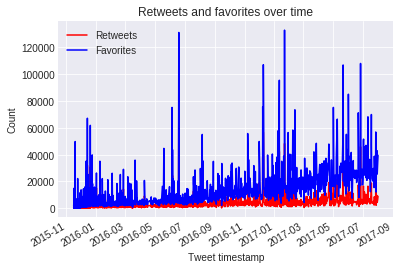

In [156]:
time_df['retweets'].plot(color = 'red', label='Retweets')
time_df['likes'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

In [158]:
time_df['rating_ratio'] = time_df['rating_numerator']/time_df['rating_denominator']

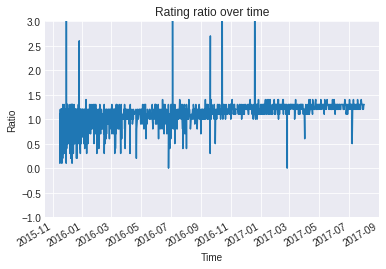

In [159]:
time_df['rating_ratio'].plot()
plt.ylim(-1, 3)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating ratio over time')
plt.savefig('ratio_zoom.png')
plt.show()

Line Equation: retweets = (0.3494377038448507)*likes + -341.74869483608745
Correlation of line of best fit: 0.9129466274183701


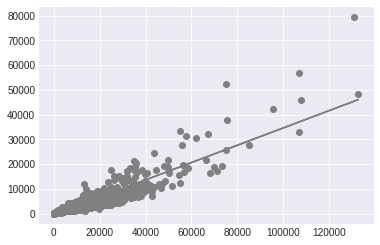

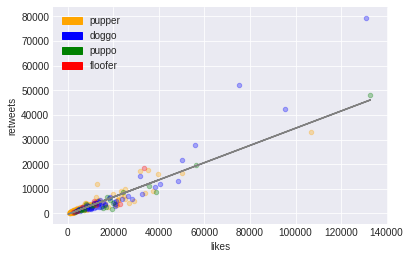

In [172]:
df = master_df[['retweets', 'likes', 'dog_stage']]

y, x = df.retweets, df.likes
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope*x+intercept
plt.plot(x, y, 'o', x, line, color='gray')

print('Line Equation: retweets = ({})*likes + {}'.format(slope,intercept))
print('Correlation of line of best fit: {}'.format(r_value))

df_puppers = df[df['dog_stage'] == 'pupper']
df_puppo = df[df['dog_stage'] == 'puppo']
df_doggo = df[df['dog_stage'] == 'doggo']
df_floofer = df[df['dog_stage'] == 'floofer']
df_none = df[df['dog_stage'] == 'None']

bx = df_puppers.plot(kind = 'scatter', x='likes', y='retweets', color='Orange', alpha=0.3)
df_doggo.plot(kind = 'scatter', x='likes', y='retweets', color='Blue', ax=bx, alpha=0.3)
df_puppo.plot(kind = 'scatter', x='likes', y='retweets', color='Green', ax=bx, alpha=0.3)
df_floofer.plot(kind = 'scatter', x='likes', y='retweets', color='Red', ax=bx, alpha=0.3)

puppers = mpatches.Patch(label='pupper', color = 'Orange')
doggo = mpatches.Patch(label='doggo', color = 'Blue')
puppo = mpatches.Patch(label='puppo', color = 'Green')
floofer = mpatches.Patch(label='floofer', color = 'Red')

plt.legend(handles=[puppers, doggo, puppo, floofer])
plt.plot(x, line, color='gray')

plt.show()


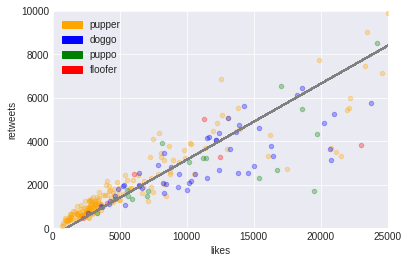

In [173]:
xlim = (0, 25000)
ylim = (0, 10000)

ax = df_puppers.plot(kind = 'scatter', x='likes', y='retweets', color='Orange', alpha=0.3, ylim=ylim, xlim=xlim)
df_doggo.plot(kind = 'scatter', x='likes', y='retweets', color='Blue', ax=ax, alpha=0.3, ylim=ylim, xlim=xlim)
df_puppo.plot(kind = 'scatter', x='likes', y='retweets', color='Green', ax=ax, alpha=0.3, ylim=ylim, xlim=xlim)
df_floofer.plot(kind = 'scatter', x='likes', y='retweets', color='Red', ax=ax, alpha=0.3, ylim=ylim, xlim=xlim)


plt.legend(handles=[puppers, doggo, puppo, floofer])
plt.plot(x, line, color='gray')

plt.show()